In [1]:
import pandas as pd
import glob

In [2]:
#files_all = glob.glob('data/*.csv')
platform = glob.glob('data/ch_platform_*.csv')
platformer = glob.glob('data/ch_platformer_*.csv')

In [3]:
def short_date(value):
    return value[:7]

df = pd.DataFrame()
last_date = ''
for file in platform:
    if df.shape[0] == 0:
        df = pd.read_csv(file, usecols=['Name', 'Release', 'Update', 'Rank']) # 'Release', 'Update', 
        df['Release'] = df['Release'].apply(short_date)
        df['Update'] = df['Update'].apply(short_date)
    else:
        the_date = file.split('_')[2][:-4]
        new_df = pd.read_csv(file, usecols=['Name', 'Rank'])
        df = df.merge(new_df, how='outer', on='Name', suffixes=('', '_'+the_date), copy=False)
        last_date = the_date
    
df.head(2)

,Name,Rank,Release,Update,Rank_2016-08-23,Rank_2016-08-25,Rank_2016-08-27,Rank_2016-09-08,Rank_2016-09-18
0,Lep's World Kostenlos - das super beste Jump a...,1.0,2011-12,2016-08,1.0,1.0,1.0,NaN,NaN
1,Mega Run - Redford's Adventure,2.0,2012-05,2015-12,2.0,2.0,2.0,2.0,2.0


In [4]:
df['rank_delta'] = df['Rank_' + last_date] - df['Rank']
best_ev = df.sort_values(by='rank_delta').head(5)
worst_ev = df.sort_values(by='rank_delta', ascending=False).head(5)

In [5]:
worst_ev

,Name,Rank,Release,Update,Rank_2016-08-23,Rank_2016-08-25,Rank_2016-08-27,Rank_2016-09-08,Rank_2016-09-18,rank_delta
47,Rocco´s Block Land - a super 2d retro jump and...,48.0,2012-07,2014-12,48.0,49.0,49.0,135.0,134.0,86.0
8,Kiba & Kumba: Jungle Run - SpielAffe ™ kostenl...,9.0,2013-07,2014-04,9.0,10.0,9.0,56.0,57.0,48.0
9,Kiba & Kumba: Jungle Jump - SpielAffe™ gratis ...,10.0,2013-08,2013-10,10.0,11.0,11.0,57.0,54.0,44.0
49,PlayKids Party - Spiele und Aktivitäten für Ki...,50.0,2015-12,2016-08,50.0,48.0,61.0,71.0,75.0,25.0
118,ReRunners: Race for the World,119.0,2016-07,2016-08,119.0,119.0,130.0,126.0,128.0,9.0


In [6]:
best_ev

,Name,Rank,Release,Update,Rank_2016-08-23,Rank_2016-08-25,Rank_2016-08-27,Rank_2016-09-08,Rank_2016-09-18,rank_delta
92,"Edgar the Explorer, Jump ’n’ Run",93.0,2016-08,2016-08,92.0,131.0,51.0,32.0,47.0,-46.0
83,Mercurial Story,84.0,2014-11,2014-11,84.0,84.0,87.0,75.0,74.0,-10.0
77,Leap Day,78.0,2016-05,2016-07,78.0,77.0,78.0,74.0,71.0,-7.0
58,Real Slender Man Free,59.0,2013-12,2013-12,58.0,59.0,60.0,53.0,52.0,-7.0
99,INOQONI - Puzzle und Plattform,100.0,2013-12,2014-03,100.0,98.0,102.0,94.0,94.0,-6.0


In [7]:
df[df['Name'].str.contains('Edgar')]

,Name,Rank,Release,Update,Rank_2016-08-23,Rank_2016-08-25,Rank_2016-08-27,Rank_2016-09-08,Rank_2016-09-18,rank_delta
92,"Edgar the Explorer, Jump ’n’ Run",93.0,2016-08,2016-08,92.0,131.0,51.0,32.0,47.0,-46.0


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

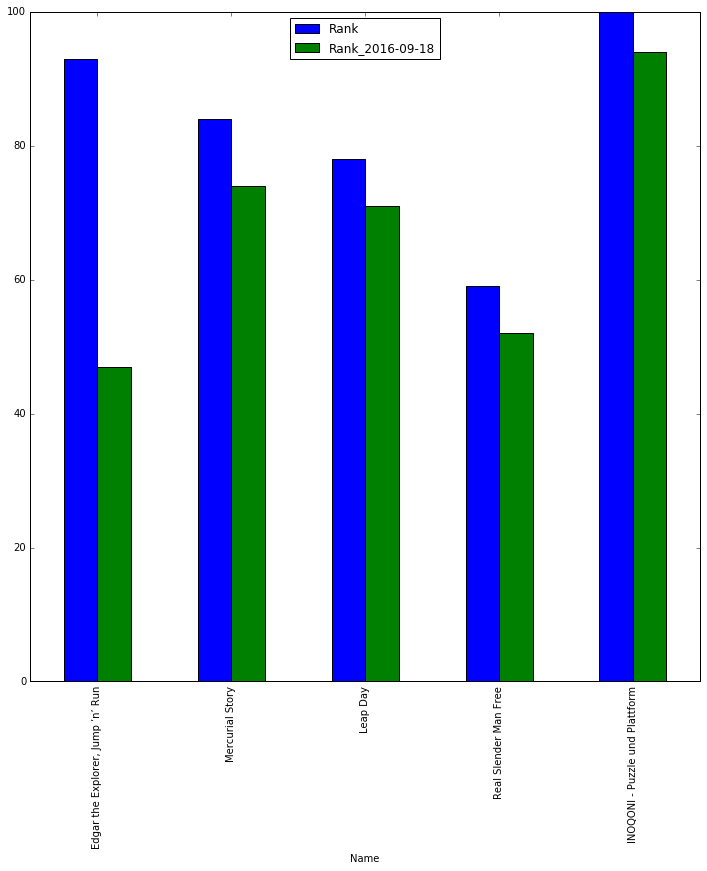

In [9]:
#df[['rank_delta', 'Name']].plot(kind='barh', figsize=(12, 12))

columns = ['Rank', 'Rank_' + last_date]
#df.index = df['Name']
best_ev.index = best_ev['Name']
best_ev.head(20)[columns].plot(kind='bar', figsize=(12, 12))

In [10]:
df = df.sort_values(by='Rank_' + last_date)

In [11]:
dfx = df[['Name', 'Rank_'+last_date, 'Rank', 'rank_delta', 'Release', 'Update']]
#dfx = dfx[dfx['Rank_'+last_date] == dfx['Rank_'+last_date]]
dfx.head()

,Name,Rank_2016-09-18,Rank,rank_delta,Release,Update
165,Lep's World Kostenlos - super Jump and Run Spiele,1.0,NaN,NaN,NaN,NaN
1,Mega Run - Redford's Adventure,2.0,2.0,0.0,2012-05,2015-12
3,Die Schlümpfe Epic Run - Fun Platform Adventure,3.0,4.0,-1.0,2016-01,2016-07
2,Aerox,4.0,3.0,1.0,2010-07,2013-09
166,Piggy Show,5.0,NaN,NaN,NaN,NaN


In [12]:
dfx.to_excel('platform-sort-last.xls', index=False)

In [13]:
!open .